In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
x_df = pd.read_csv('x_train.csv')
y_df = pd.read_csv('y_train.csv')

In [3]:
x_df.head()

,Sample_Number,DAT,time,fan,co2,heater,window1,window2,curtain1,curtain2,...,rain_sensor,crown_diameter,petiole_length,leaf_count,leaf_length,leaf_width,fruit_count,plant_height,flower_count,numbers of plant
0,1,16,0:00:00,0,0,0,0,0,0,0,...,0,1.55,12.4,4,9.4,8.1,0,11.21,0,600
1,1,16,0:10:00,0,0,0,0,0,50,50,...,0,1.55,12.4,4,9.4,8.1,0,11.21,0,600
2,1,16,0:20:00,0,0,0,0,0,30,30,...,0,1.55,12.4,4,9.4,8.1,0,11.21,0,600
3,1,16,0:30:00,0,0,0,0,0,30,30,...,0,1.55,12.4,4,9.4,8.1,0,11.21,0,600
4,1,16,0:40:00,0,0,0,0,0,30,30,...,0,1.55,12.4,4,9.4,8.1,0,11.21,0,600


In [7]:
# 시간 정보(datetime) 생성: DAT는 무시하고 시간만 사용
x_df['datetime'] = pd.to_datetime("2025-01-01 " + x_df['time'])

# 고유 Sample_Number 목록
unique_samples = x_df['Sample_Number'].unique()

# datetime 컬럼에서 date만 추출 (하루 단위로 그룹화)
x_df['date'] = x_df['datetime'].dt.date

group_col = 'Sample_Number'
numeric_cols = x_df.select_dtypes(include='number').columns.tolist()
# group_col은 그룹 기준이되, 나머지 숫자 컬럼 중 중복 방지
agg_cols = [col for col in numeric_cols if col != group_col]

x_sample = x_df.groupby(group_col)[agg_cols].mean().reset_index()

In [8]:
y_sample = y_df.groupby('Sample_Number').mean().reset_index()

In [9]:
merged_df = pd.merge(x_sample, y_sample, on='Sample_Number', how='inner')

in_co2            0.661527
in_hum            0.601918
curtain3          0.486599
petiole_length    0.468498
fan               0.370619
heater            0.242005
leaf_count        0.194103
plant_height      0.166502
fruit_count       0.166337
wind_direction    0.154000
flower_count      0.128774
DAT               0.128063
crown_diameter    0.122932
side_curtain      0.079634
wind_speed        0.062823
co2               0.041301
out_hum          -0.005277
rain_sensor      -0.028728
solar_rad        -0.042870
leaf_length      -0.118608
leaf_width       -0.171253
out_temp         -0.246286
curtain2         -0.267184
window2          -0.372864
window1          -0.372864
in_temp          -0.392238
curtain1         -0.524577
Name: CO2 final, dtype: float64


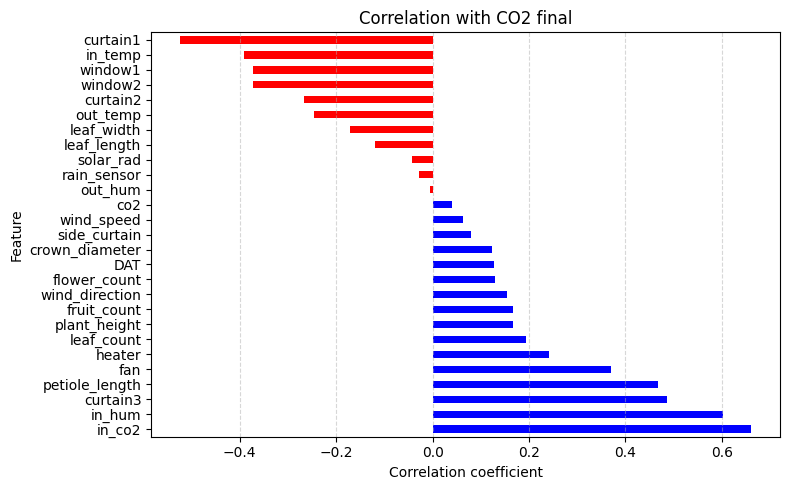

In [ ]:
exclude_cols = ['Sample_Number', 'CO2 final', 'numbers of plant', 'date']  # 제외할 컬럼들

y_col = 'CO2 final'
# 상관계수 전체 계산
corrs = merged_df.corr()
# CO2 final 컬럼으로부터 뽑기 & 제외리스트 제외 & 자기자신도 제외 (원하면)
corr_with_y = corrs[y_col].drop(labels=exclude_cols, errors='ignore')
# 값 내림차순 정렬(양수값 큰 게 위에, 보통 해석 편하게)
corr_with_y = corr_with_y.sort_values(ascending=False)
print(corr_with_y)

plt.figure(figsize=(8, 5))
corr_with_y.plot(kind='barh', color=['blue' if v >= 0 else 'red' for v in corr_with_y])
plt.title("Correlation with CO2 final")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [16]:
print(x_df.dtypes)

Sample_Number                int64
DAT                          int64
time                        object
fan                          int64
co2                          int64
heater                       int64
window1                      int64
window2                      int64
curtain1                     int64
curtain2                     int64
curtain3                     int64
side_curtain                 int64
in_temp                    float64
in_hum                     float64
in_co2                     float64
out_temp                   float64
out_hum                    float64
solar_rad                  float64
wind_speed                 float64
wind_direction             float64
rain_sensor                  int64
crown_diameter             float64
petiole_length             float64
leaf_count                   int64
leaf_length                float64
leaf_width                 float64
fruit_count                  int64
plant_height               float64
flower_count        

In [17]:
# 원하는 시간 범위
start_hour = 10
end_hour = 14

filtered_df = x_df[
    (x_df['datetime'].dt.hour >= start_hour) &
    (x_df['datetime'].dt.hour <= end_hour)
].copy()

In [18]:
group_col = 'Sample_Number'

numeric_cols = filtered_df.select_dtypes(include='number').columns.tolist()
agg_cols = [col for col in numeric_cols if col != group_col]

x_sample = filtered_df.groupby(group_col)[agg_cols].mean().reset_index()

y_sample = y_df.groupby(group_col).mean().reset_index()

merged_df = pd.merge(x_sample, y_sample, on=group_col, how='inner')

petiole_length      0.468498
in_co2              0.443067
in_hum              0.430542
curtain3            0.276260
wind_direction      0.204256
leaf_count          0.194103
plant_height        0.166502
fruit_count         0.166337
flower_count        0.128774
DAT                 0.128063
crown_diameter      0.122932
wind_speed          0.089086
rain_sensor         0.047131
co2                 0.008516
fan                -0.001725
out_hum            -0.017165
solar_rad          -0.031059
heater             -0.048255
side_curtain       -0.105875
leaf_length        -0.118608
in_temp            -0.137470
leaf_width         -0.171253
out_temp           -0.262199
window2            -0.367524
window1            -0.367524
curtain2           -0.538687
curtain1           -0.607927
numbers of plant   -0.614354
Name: CO2 final, dtype: float64


C:\Users\totso\AppData\Local\Temp\ipykernel_22928\3318400614.py:16: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\totso\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


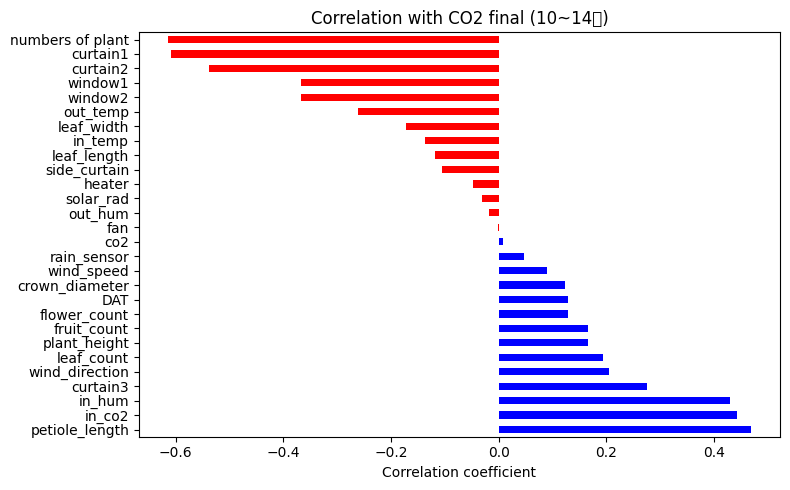

In [19]:
y_col = 'CO2 final'  # 실제 타겟 컬럼명

# 제외하고 싶은 컬럼들(예시)
exclude_cols = ['Sample_Number', y_col]

corrs = merged_df.corr()
corr_with_y = corrs[y_col].drop(labels=exclude_cols, errors='ignore').sort_values(ascending=False)
print(corr_with_y)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
corr_with_y.plot(kind='barh', color=['blue' if v >= 0 else 'red' for v in corr_with_y])
plt.title(f"Correlation with {y_col} (10~14시)")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

petiole_length      0.468498
in_co2              0.443067
in_hum              0.430542
curtain3            0.276260
wind_direction      0.204256
leaf_count          0.194103
plant_height        0.166502
fruit_count         0.166337
flower_count        0.128774
DAT                 0.128063
crown_diameter      0.122932
wind_speed          0.089086
rain_sensor         0.047131
co2                 0.008516
fan                -0.001725
out_hum            -0.017165
solar_rad          -0.031059
heater             -0.048255
side_curtain       -0.105875
leaf_length        -0.118608
in_temp            -0.137470
leaf_width         -0.171253
out_temp           -0.262199
window2            -0.367524
window1            -0.367524
curtain2           -0.538687
curtain1           -0.607927
numbers of plant   -0.614354
Name: CO2 final, dtype: float64


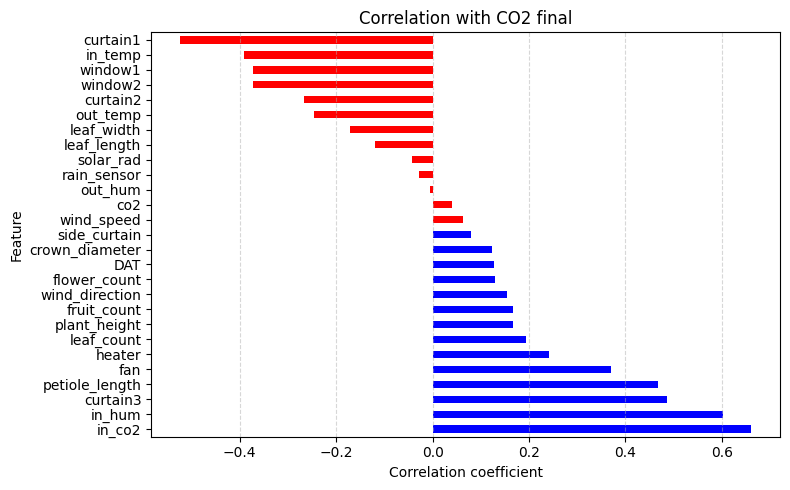

petiole_length      0.468498
in_co2              0.443067
in_hum              0.430542
curtain3            0.276260
wind_direction      0.204256
leaf_count          0.194103
plant_height        0.166502
fruit_count         0.166337
flower_count        0.128774
DAT                 0.128063
crown_diameter      0.122932
wind_speed          0.089086
rain_sensor         0.047131
co2                 0.008516
fan                -0.001725
out_hum            -0.017165
solar_rad          -0.031059
heater             -0.048255
side_curtain       -0.105875
leaf_length        -0.118608
in_temp            -0.137470
leaf_width         -0.171253
out_temp           -0.262199
window2            -0.367524
window1            -0.367524
curtain2           -0.538687
curtain1           -0.607927
numbers of plant   -0.614354
Name: CO2 final, dtype: float64


C:\Users\totso\AppData\Local\Temp\ipykernel_22928\3066743669.py:80: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\totso\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


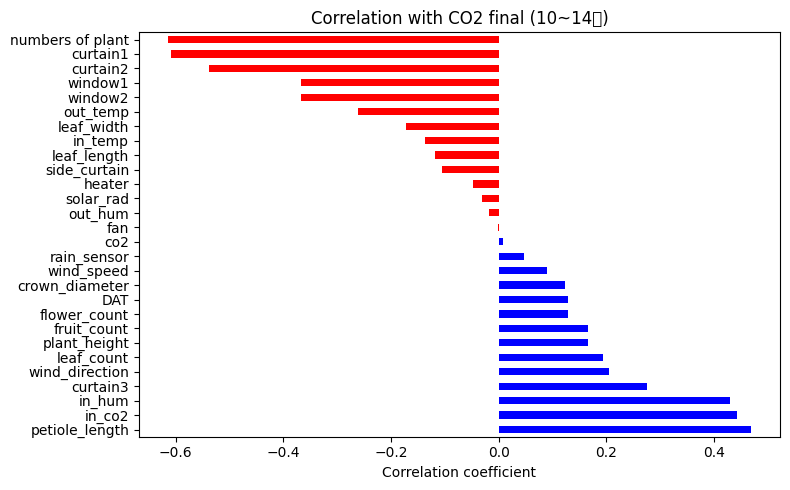

                   AllTime    10to14          Diff
DAT               0.128063  0.128063  0.000000e+00
co2               0.041301  0.008516 -3.278461e-02
crown_diameter    0.122932  0.122932 -1.110223e-16
curtain1         -0.524577 -0.607927 -8.334987e-02
curtain2         -0.267184 -0.538687 -2.715029e-01
curtain3          0.486599  0.276260 -2.103396e-01
fan               0.370619 -0.001725 -3.723437e-01
flower_count      0.128774  0.128774  0.000000e+00
fruit_count       0.166337  0.166337  0.000000e+00
heater            0.242005 -0.048255 -2.902597e-01
in_co2            0.661527  0.443067 -2.184604e-01
in_hum            0.601918  0.430542 -1.713762e-01
in_temp          -0.392238 -0.137470  2.547682e-01
leaf_count        0.194103  0.194103  0.000000e+00
leaf_length      -0.118608 -0.118608  4.163336e-17
leaf_width       -0.171253 -0.171253  0.000000e+00
numbers of plant       NaN -0.614354           NaN
out_hum          -0.005277 -0.017165 -1.188782e-02
out_temp         -0.246286 -0.2

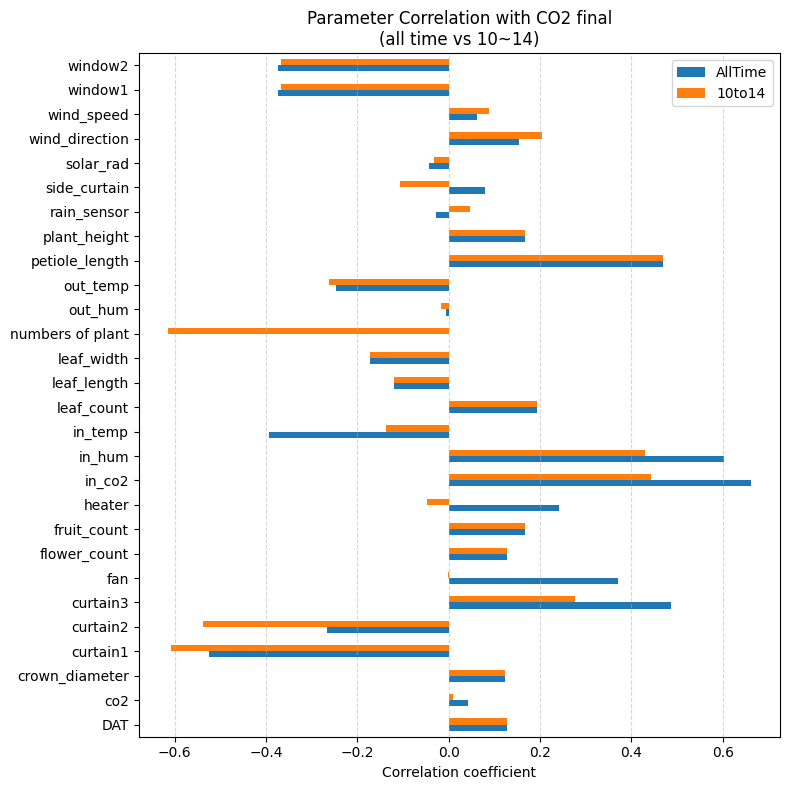

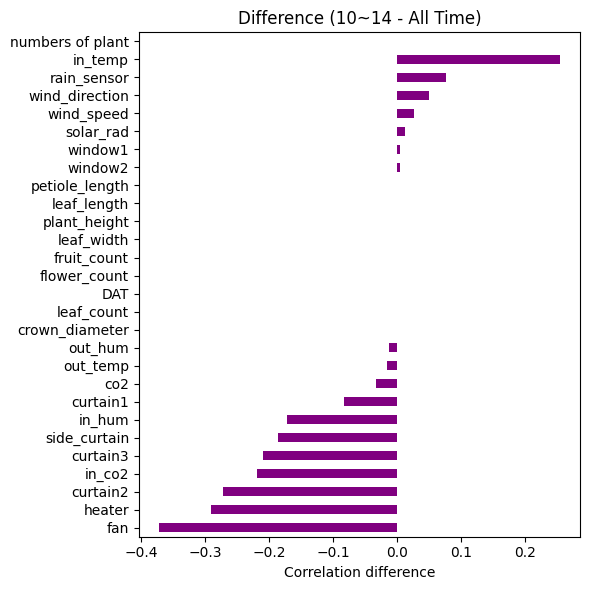

In [25]:
x_df = pd.read_csv('x_train.csv')
y_df = pd.read_csv('y_train.csv')

# 시간 정보(datetime) 생성: DAT는 무시하고 시간만 사용
x_df['datetime'] = pd.to_datetime("2025-01-01 " + x_df['time'])

# 고유 Sample_Number 목록
unique_samples = x_df['Sample_Number'].unique()

# datetime 컬럼에서 date만 추출 (하루 단위로 그룹화)
x_df['date'] = x_df['datetime'].dt.date

group_col = 'Sample_Number'
numeric_cols = x_df.select_dtypes(include='number').columns.tolist()
# group_col은 그룹 기준이되, 나머지 숫자 컬럼 중 중복 방지
agg_cols = [col for col in numeric_cols if col != group_col]

x_sample = x_df.groupby(group_col)[agg_cols].mean().reset_index()

y_sample = y_df.groupby('Sample_Number').mean().reset_index()

merged_df = pd.merge(x_sample, y_sample, on='Sample_Number', how='inner')

exclude_cols = ['Sample_Number', 'CO2 final', 'numbers of plant', 'date']  # 제외할 컬럼들

y_col = 'CO2 final'
# 상관계수 전체 계산
corrs_all = merged_df.corr()
# CO2 final 컬럼으로부터 뽑기 & 제외리스트 제외 & 자기자신도 제외 (원하면)
corr_all = corrs_all[y_col].drop(labels=exclude_cols, errors='ignore')
# 값 내림차순 정렬(양수값 큰 게 위에, 보통 해석 편하게)
corr_all = corr_all.sort_values(ascending=False)
print(corr_with_y)

plt.figure(figsize=(8, 5))
corr_all.plot(kind='barh', color=['blue' if v >= 0 else 'red' for v in corr_with_y])
plt.title("Correlation with CO2 final")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
############################################################################
start_hour = 10
end_hour = 14

filtered_df = x_df[
    (x_df['datetime'].dt.hour >= start_hour) &
    (x_df['datetime'].dt.hour <= end_hour)
].copy()

group_col = 'Sample_Number'

numeric_cols = filtered_df.select_dtypes(include='number').columns.tolist()
agg_cols = [col for col in numeric_cols if col != group_col]

x_sample = filtered_df.groupby(group_col)[agg_cols].mean().reset_index()

y_sample = y_df.groupby(group_col).mean().reset_index()

merged_df = pd.merge(x_sample, y_sample, on=group_col, how='inner')

y_col = 'CO2 final'  # 실제 타겟 컬럼명

# 제외하고 싶은 컬럼들(예시)
exclude_cols = ['Sample_Number', y_col]

corrs_time = merged_df.corr()
corr_time = corrs_time[y_col].drop(labels=exclude_cols, errors='ignore').sort_values(ascending=False)

corr_time = corr_time.sort_values(ascending=False)

print(corr_time)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
corr_time.plot(kind='barh', color=['blue' if v >= 0 else 'red' for v in corr_with_y])
plt.title(f"Correlation with {y_col} (10~14시)")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

#####################################################################################################

corr_compare = pd.DataFrame({
    'AllTime': corr_all,
    '10to14': corr_time
})
corr_compare['Diff'] = corr_compare['10to14'] - corr_compare['AllTime']
print(corr_compare)

# ==== 4. 시각화 ====
corr_compare[['AllTime', '10to14']].plot(kind='barh', figsize=(8,8))
plt.title("Parameter Correlation with CO2 final\n(all time vs 10~14)")
plt.xlabel('Correlation coefficient')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 변화량(차이)만 막대그래프
corr_compare['Diff'].sort_values().plot(kind='barh', color='purple', figsize=(6,6))
plt.title("Difference (10~14 - All Time)")
plt.xlabel('Correlation difference')
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 0. 예시 데이터 준비(이미 csv 등으로 불러왔다고 가정)
# x_df = pd.read_csv(...)
# y_df = pd.read_csv(...)
# x_df에는 datetime 컬럼 있음(y_df에도 날짜 컬럼 필요)

# ==== 1. 전체 데이터: 날짜해상도 맞추기 ====
# 시간 정보(datetime) 생성: DAT는 무시하고 시간만 사용
x_df['datetime'] = pd.to_datetime("2025-01-01 " + x_df['time'])

# 숫자형 변수 자동 선택
group_cols = ['Sample_Number', 'date']
numeric_cols = x_df.select_dtypes(include='number').columns.tolist()
agg_cols = [col for col in numeric_cols if col not in group_cols]

# x 일평균 데이터
x_daily = x_df.groupby(group_cols)[agg_cols].mean().reset_index()

# y_df도 Sample_Number, date별(혹시 여러 row 있을 경우)
y_daily = y_df.groupby(['Sample_Number']).mean().reset_index()

# 병합
merged_all = pd.merge(x_daily, y_daily, on=['Sample_Number'])

# 상관계수
y_col = 'CO2 final'
exclude_cols = ['Sample_Number', y_col]
corr_all = merged_all.corr()[y_col].drop(labels=exclude_cols, errors='ignore')

# ==== 2. 특정 시간대(10~14시) 데이터: 날짜해상도 맞추기 ====
time_filtered = x_df[(x_df['datetime'].dt.hour >= 10) & (x_df['datetime'].dt.hour <= 14)].copy()

x_daily_time = time_filtered.groupby(group_cols)[agg_cols].mean().reset_index()
merged_time = pd.merge(x_daily_time, y_daily, on=['Sample_Number','date'])
corr_time = merged_time.corr()[y_col].drop(labels=exclude_cols, errors='ignore')

# ==== 3. 두 결과 비교 ====
corr_compare = pd.DataFrame({
    'AllTime': corr_all,
    '10to14': corr_time
})
corr_compare['Diff'] = corr_compare['10to14'] - corr_compare['AllTime']
print(corr_compare)

# ==== 4. 시각화 ====
corr_compare[['AllTime', '10to14']].plot(kind='barh', figsize=(8,8))
plt.title("Parameter Correlation with CO2 final\n(전 구간 vs 10~14시 구간)")
plt.xlabel('Correlation coefficient')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 변화량(차이)만 막대그래프
corr_compare['Diff'].sort_values().plot(kind='barh', color='purple', figsize=(6,6))
plt.title("Difference (10~14시 - 전체)")
plt.xlabel('Correlation difference')
plt.tight_layout()
plt.show()

TypeError: float() argument must be a string or a number, not 'datetime.date'

C:\Users\ubloc\AppData\Local\Temp\ipykernel_36504\506537763.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_sample['in_co2'].resample('1H').mean()


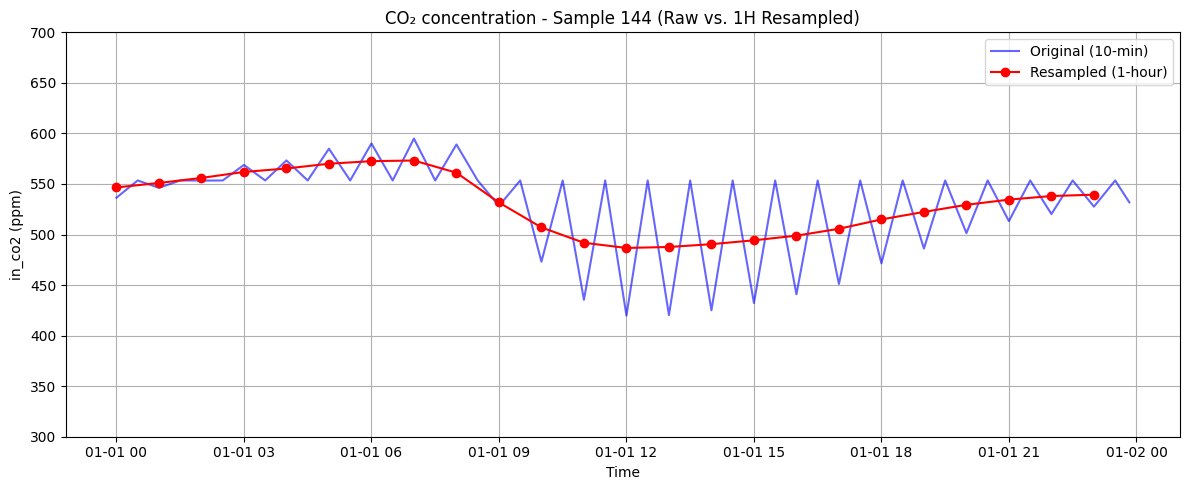

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

x_df['datetime'] = pd.to_datetime("2025-01-01 " + x_df['time'])

# 예시: Sample 144에 대한 처리
sample_num = 144
df_sample = x_df[x_df['Sample_Number'] == sample_num].copy()
df_sample['datetime'] = pd.to_datetime(df_sample['datetime'])

# datetime 인덱스 설정
df_sample.set_index('datetime', inplace=True)

# 1시간 단위로 평균 리샘플링
df_resampled = df_sample['in_co2'].resample('1H').mean()

# 그래프
plt.figure(figsize=(12, 5))
plt.plot(df_sample.index, df_sample['in_co2'], color='blue', alpha=0.6, label='Original (10-min)')
plt.plot(df_resampled.index, df_resampled.values, marker='o', color='red', label='Resampled (1-hour)')
plt.title(f'CO₂ concentration - Sample {sample_num} (Raw vs. 1H Resampled)')
plt.xlabel('Time')
plt.ylabel('in_co2 (ppm)')
plt.ylim(300, 700)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
